<a href="https://colab.research.google.com/github/JacekPardyak/tb-data-science-talks/blob/master/2022-06-09/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
system('sudo apt-get install libnlopt-dev')
if(!require(devtools)) install.packages('devtools')
devtools::install_github('bbc/bbplot')
library(bbplot)
library(tidyverse)

Loading required package: devtools

Loading required package: usethis




rlang        (1.0.1 -> 1.0.2     ) [CRAN]
desc         (1.4.0 -> 1.4.1     ) [CRAN]
xfun         (0.29  -> 0.30      ) [CRAN]
MatrixModels (NA    -> 0.5-0     ) [CRAN]
SparseM      (NA    -> 1.81      ) [CRAN]
numDeriv     (NA    -> 2016.8-1.1) [CRAN]
sp           (NA    -> 1.4-6     ) [CRAN]
RcppEigen    (NA    -> 0.3.3.9.1 ) [CRAN]
Rcpp         (1.0.8 -> 1.0.8.2   ) [CRAN]
nloptr       (NA    -> 2.0.0     ) [CRAN]
minqa        (NA    -> 1.2.4     ) [CRAN]
withr        (2.4.3 -> 2.5.0     ) [CRAN]
lme4         (NA    -> 1.1-28    ) [CRAN]
maptools     (NA    -> 1.1-3     ) [CRAN]
quantreg     (NA    -> 5.88      ) [CRAN]
pbkrtest     (NA    -> 0.5.1     ) [CRAN]
abind        (NA    -> 1.4-5     ) [CRAN]
carData      (NA    -> 3.0-5     ) [CRAN]
car          (NA    -> 3.0-12    ) [CRAN]
corrplot     (NA    -> 0.92      ) [CRAN]
rstatix      (NA    -> 0.7.0     ) [CRAN]
polynom      (NA    -> 1.4-0     ) [CRAN]
gridExtra    (NA    -> 2.3       ) [CRAN]
ggsignif     (NA    -> 0.6.3     )

Installing 29 packages: rlang, desc, xfun, MatrixModels, SparseM, numDeriv, sp, RcppEigen, Rcpp, nloptr, minqa, withr, lme4, maptools, quantreg, pbkrtest, abind, carData, car, corrplot, rstatix, polynom, gridExtra, ggsignif, cowplot, ggsci, ggrepel, ggpubr, png

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpBeCSwM/remotes3b58563f2a/bbc-bbplot-82af595/DESCRIPTION’ ... OK
* preparing ‘bbplot’:
* checking DESCRIPTION meta-information ...It is recommended to use ‘given’ instead of ‘middle’.
It is recommended to use ‘given’ instead of ‘middle’.
It is recommended to use ‘given’ instead of ‘middle’.
 OK
It is recommended to use ‘given’ instead of ‘middle’.
It is recommended to use ‘given’ instead of ‘middle’.
It is recommended to use ‘given’ instead of ‘middle’.
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘bbplot_0.2.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# get logo file and data table
system('wget https://github.com/JacekPardyak/tb-data-science-talks/raw/master/2022-06-09/team.blue.png -O team.blue.png')
data <- read_csv("https://github.com/JacekPardyak/tb-data-science-talks/raw/master/2022-06-09/demo_r_mlifexp_linear.csv.gz")
data %>% head()

Rows: 2913836 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): DATAFLOW, LAST UPDATE, freq, unit, sex, age, geo, OBS_FLAG
dbl (2): TIME_PERIOD, OBS_VALUE

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


DATAFLOW,LAST UPDATE,freq,unit,sex,age,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
ESTAT:DEMO_R_MLIFEXP(1.0),03/06/21 11:00:00,A,YR,F,Y1,AL,2013,NA,e
ESTAT:DEMO_R_MLIFEXP(1.0),03/06/21 11:00:00,A,YR,F,Y1,AL,2014,79.9,e
ESTAT:DEMO_R_MLIFEXP(1.0),03/06/21 11:00:00,A,YR,F,Y1,AL,2015,79.2,e
ESTAT:DEMO_R_MLIFEXP(1.0),03/06/21 11:00:00,A,YR,F,Y1,AL,2016,79.8,NA
ESTAT:DEMO_R_MLIFEXP(1.0),03/06/21 11:00:00,A,YR,F,Y1,AL,2017,79.7,NA
ESTAT:DEMO_R_MLIFEXP(1.0),03/06/21 11:00:00,A,YR,F,Y1,AL,2018,80.2,NA


# Make a line chart

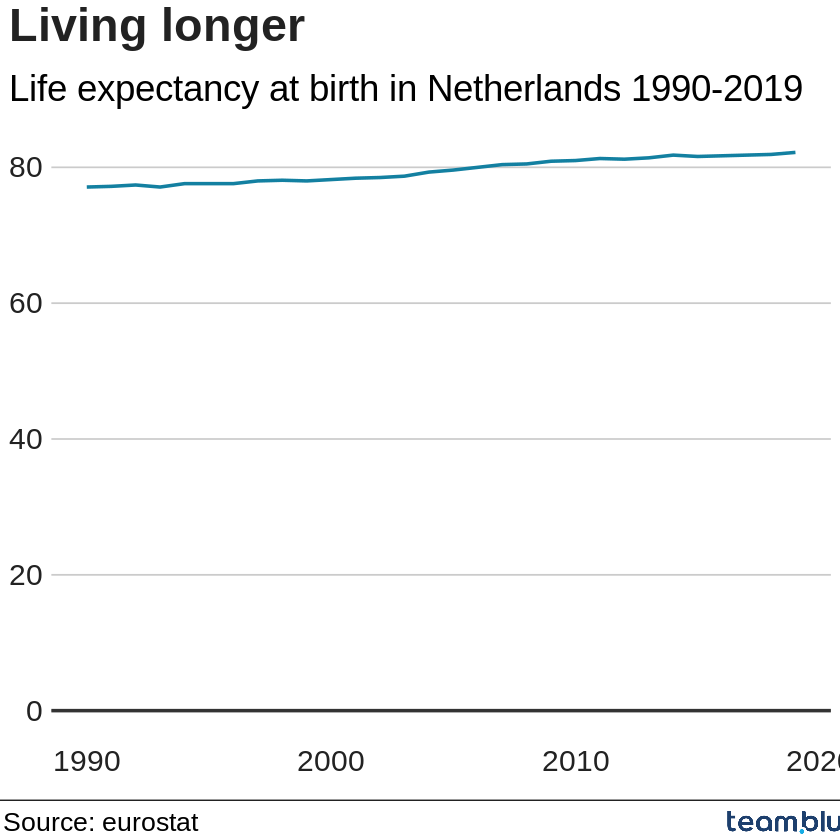

In [3]:
# prepare data
df <- data %>%
  filter(geo == "NL") %>% 
  filter(sex == "T") %>% 
  filter(age == "Y_LT1")
# make plot
my_line_plot <- df %>% 
  ggplot() +
  aes(x = 	TIME_PERIOD, y = OBS_VALUE) +
  geom_line(colour = "#1380A1", size = 1) +
  geom_hline(yintercept = 0, size = 1, colour="#333333") +
  bbc_style() +
  labs(title="Living longer",
       subtitle = "Life expectancy at birth in Netherlands 1990-2019")
# add logo and save to drive
finalise_plot(plot_name = my_line_plot,
              source = "Source: eurostat",
              save_filepath = "my_line_plot.png",
              width_pixels = 640,
              height_pixels = 450,
              logo_image_path = "team.blue.png")

# Make a multiple line chart

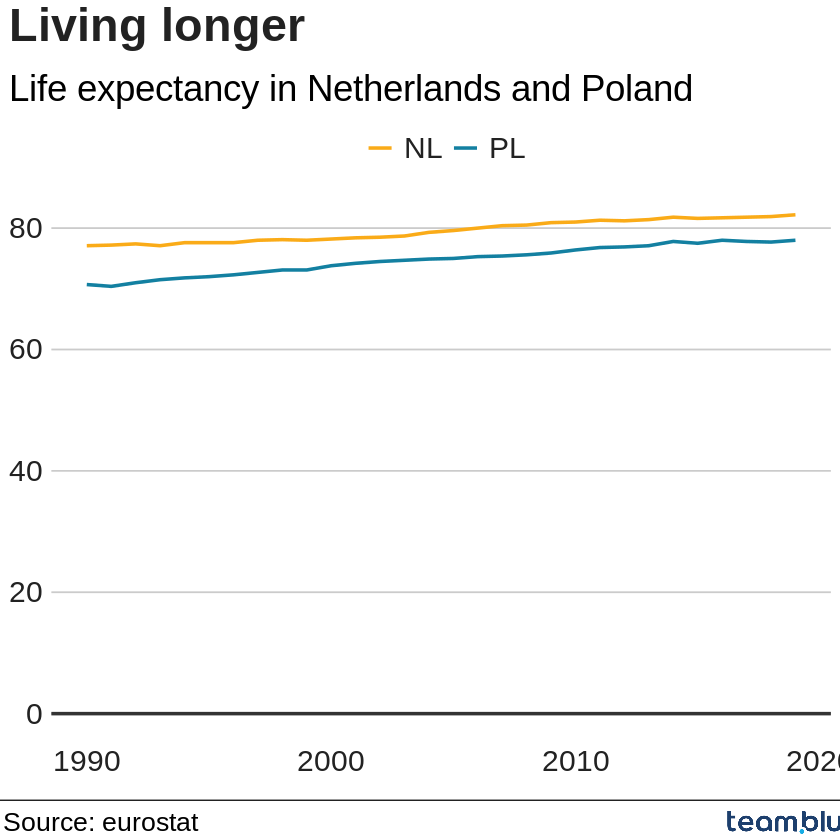

In [4]:
# prepare data
df <- data %>%
  filter(geo == "NL" |  geo == "PL") %>% 
  filter(sex == "T") %>% 
  filter(age == "Y_LT1")
# make plot
my_multiple_line_plot <- df %>% 
  ggplot() +
  aes(x = 	TIME_PERIOD, y = OBS_VALUE, colour = geo) +
  geom_line(size = 1) +
  geom_hline(yintercept = 0, size = 1, colour="#333333") +
  scale_colour_manual(values = c("#FAAB18", "#1380A1")) +
  bbc_style() +
  labs(title="Living longer",
       subtitle = "Life expectancy in Netherlands and Poland")
# add logo and save to drive
finalise_plot(plot_name = my_multiple_line_plot,
              source = "Source: eurostat",
              save_filepath = "my_multiple_line_plot.png",
              width_pixels = 640,
              height_pixels = 450,
              logo_image_path = "team.blue.png")

# Make a bar chart

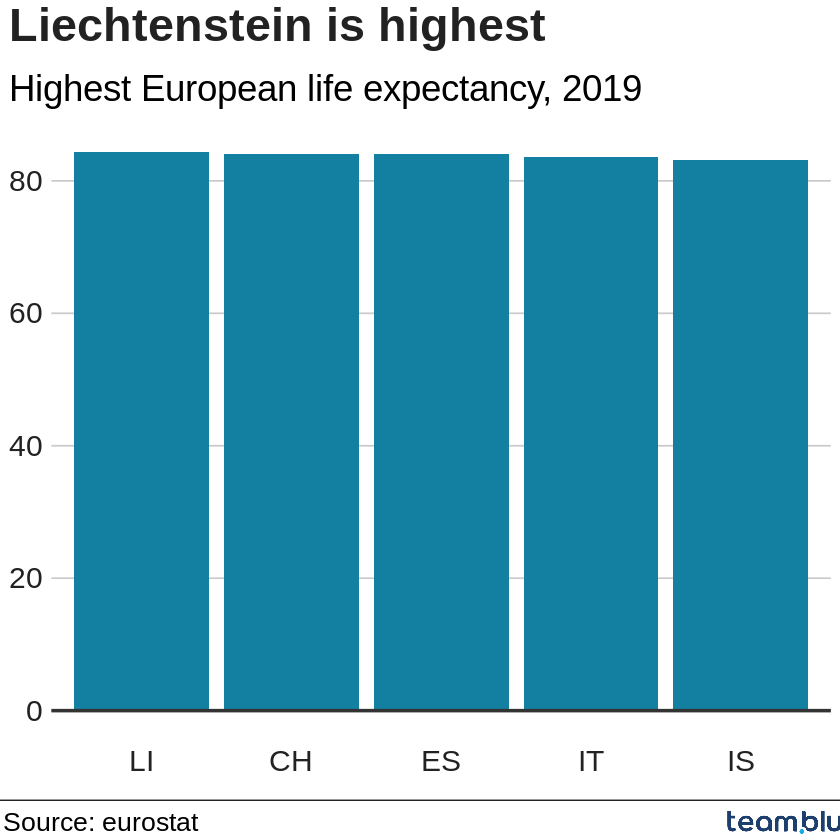

In [5]:
# prepare data
df <- data %>%
  filter(nchar(geo) == 2) %>%
  filter(TIME_PERIOD == 2019) %>%
  filter(sex == "T") %>% 
  filter(age == "Y_LT1") %>%
  arrange(desc(OBS_VALUE)) %>%
  head(5)
# Make plot
my_bars_plot <- df %>% ggplot() + 
  aes(x = reorder(geo, -OBS_VALUE) , y = OBS_VALUE) +
  geom_bar(stat="identity", 
           position="identity", 
           fill="#1380A1") +
  geom_hline(yintercept = 0, size = 1, colour="#333333") +
  bbc_style() +
  labs(title="Liechtenstein is highest",
       subtitle = "Highest European life expectancy, 2019")
# add logo and save to drive
finalise_plot(plot_name = my_bars_plot,
              source = "Source: eurostat",
              save_filepath = "my_bars_plot.png",
              width_pixels = 640,
              height_pixels = 450,
              logo_image_path = "team.blue.png")       

# Make a stacked bar chart

`summarise()` has grouped output by 'sex'. You can override using the `.groups`
argument.


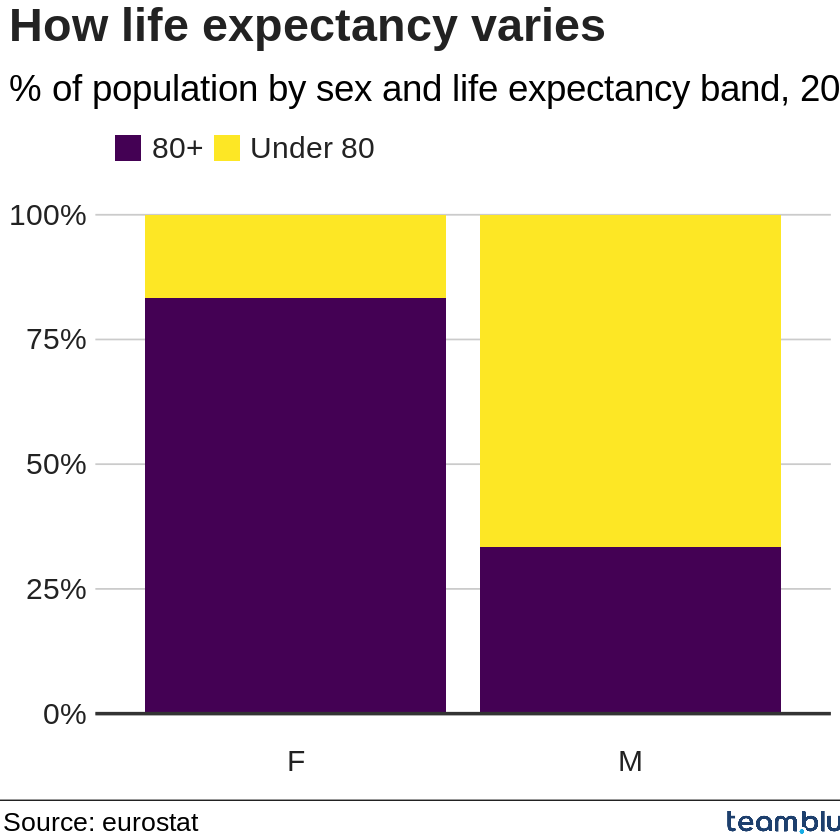

In [6]:
# prepare data
df <- data %>% 
mutate(pop = 1) %>%
  filter(nchar(geo) == 2) %>%
  filter(TIME_PERIOD == 2019) %>%
  filter(sex == "M" | sex == "F" ) %>% 
  filter(age == "Y_LT1") %>%
  mutate(lifeExpGrouped = cut(OBS_VALUE, 
                    breaks = c(0, 80, 90),
                    labels = c("Under 80", "80+"))) %>%
  group_by(sex, lifeExpGrouped) %>%
  summarise(continentPop = sum(as.numeric(pop)))
# make plot
my_stacked_bars <- df %>% 
  ggplot() +
  aes(x = sex,
  y = continentPop,
  fill = lifeExpGrouped) +
  geom_bar(stat = "identity", 
           position = "fill") +
  bbc_style() +
  scale_y_continuous(labels = scales::percent) +
  scale_fill_viridis_d(direction = -1) +
  geom_hline(yintercept = 0, size = 1, colour = "#333333") +
  labs(title = "How life expectancy varies",
       subtitle = "% of population by sex and life expectancy band, 2019") +
  theme(legend.position = "top", 
        legend.justification = "left") +
  guides(fill = guide_legend(reverse = TRUE))
# add logo and save to drive
finalise_plot(plot_name = my_stacked_bars,
              source = "Source: eurostat",
              save_filepath = "my_stacked_bars.png",
              width_pixels = 640,
              height_pixels = 450,
              logo_image_path = "team.blue.png")              

# Make a grouped bar chart

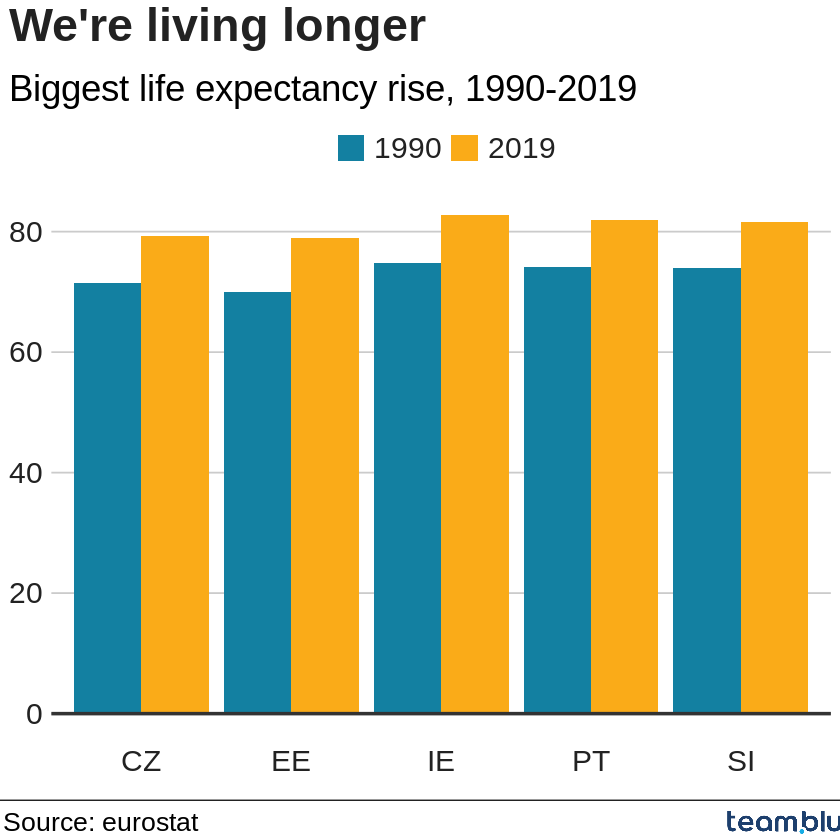

In [7]:
# prepare data
df <- data %>% 
  filter(nchar(geo) == 2) %>%
  filter(sex == "T") %>% 
  filter(age == "Y_LT1") %>%
  filter(TIME_PERIOD == 1990 | TIME_PERIOD == 2019 ) %>%
  select(geo, TIME_PERIOD, OBS_VALUE) %>%
  spread(TIME_PERIOD, OBS_VALUE) %>%
  mutate(gap = `2019` - `1990`) %>%
  arrange(desc(gap)) %>%
  head(5) %>%
  gather(key = TIME_PERIOD, 
         value = OBS_VALUE,
         -geo,
         -gap) 
# make plot
my_grouped_bars <- df %>% ggplot() +
                       aes(x = geo, 
                           y = OBS_VALUE, 
                           fill = as.factor(TIME_PERIOD)) +
  geom_bar(stat="identity", position="dodge") +
  geom_hline(yintercept = 0, size = 1, colour="#333333") +
  bbc_style() +
  scale_fill_manual(values = c("#1380A1", "#FAAB18")) +
  labs(title="We're living longer",
       subtitle = "Biggest life expectancy rise, 1990-2019")
# add logo and save to drive
finalise_plot(plot_name = my_grouped_bars,
              source = "Source: eurostat",
              save_filepath = "my_grouped_bars.png",
              width_pixels = 640,
              height_pixels = 450,
              logo_image_path = "team.blue.png")  

# Make a dumbbell chart

Loading required package: ggalt

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘ggalt’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘extrafontdb’, ‘Rttf2pt1’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’, ‘proj4’, ‘ash’, ‘maps’, ‘extrafont’, ‘plotly’


Registered S3 methods overwritten by 'ggalt':
  method                  from   
  grid.draw.absoluteGrob  ggplot2
  grobHeight.absoluteGrob ggplot2
  grobWidth.absoluteGrob  ggplot2
  grobX.absoluteGrob      ggplot2
  grobY.absoluteGrob      ggplot2



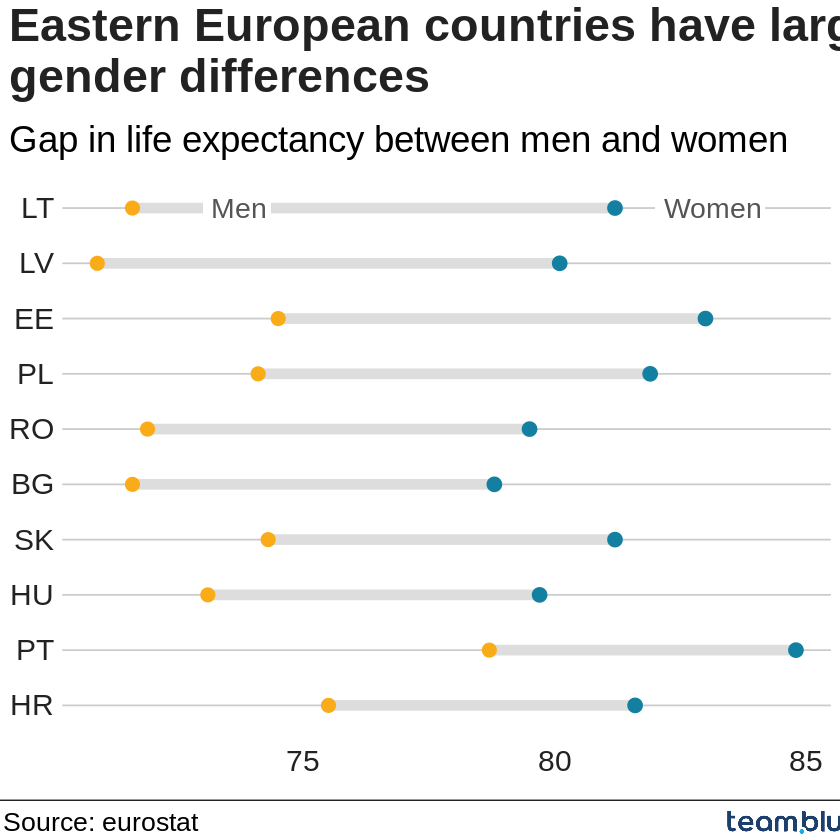

In [8]:
if(!require(ggalt)) install.packages('ggalt')
library("ggalt")
#library("tidyr")

# prepare data
df <- data %>% 
  filter(TIME_PERIOD == 2019) %>%
  filter(sex == "F" | sex == "M") %>%
  filter(nchar(geo) == 2 ) %>% 
  filter(age == "Y_LT1") %>%
  select(geo, sex, OBS_VALUE) %>%
  spread(sex, OBS_VALUE) %>%
  rename(Male = M, Female = F) %>%
  mutate(gap = Female - Male) %>%
  arrange(desc(gap)) %>%
  head(10)
# make plot
my_dumbbell_plot <- df %>% 
  ggplot() + 
  aes(x = Male, xend = Female, y = reorder(geo, gap), group = geo) + 
  geom_dumbbell(colour = "#dddddd",
                size = 3,
                colour_x = "#FAAB18",
                colour_xend = "#1380A1") +
  bbc_style() + 
  labs(title="Eastern European countries have large\ngender differences",
      subtitle="Gap in life expectancy between men and women") + 
      geom_label(aes(x = 82, y = 'LT', label = "Women"), 
                           hjust = 0, 
                           vjust = 0.5, 
                           colour = "#555555", 
                           fill = "white", 
                           label.size = NA, 
                           family="Helvetica", 
                           size = 6) + 
      geom_label(aes(x = 73, y = 'LT', label = "Men"), 
                           hjust = 0, 
                           vjust = 0.5, 
                           colour = "#555555", 
                           fill = "white", 
                           label.size = NA, 
                           family="Helvetica", 
                           size = 6)
# add logo and save to drive                           
finalise_plot(plot_name = my_dumbbell_plot,
              source = "Source: eurostat",
              save_filepath = "my_dumbbell_plot.png",
              width_pixels = 640,
              height_pixels = 450,
              logo_image_path = "team.blue.png")

vvvv

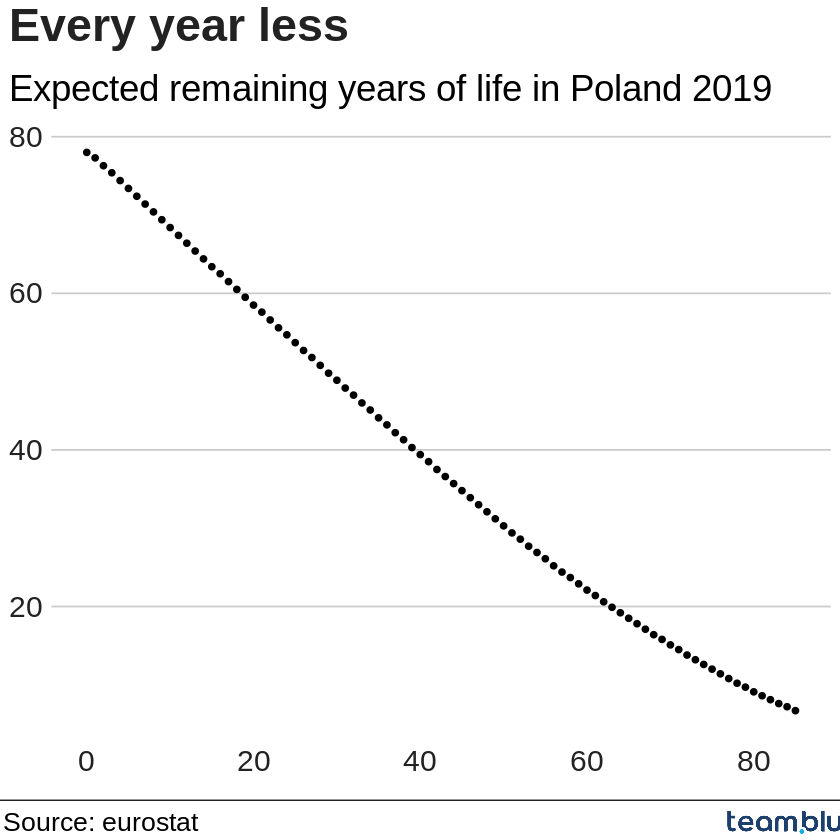

In [9]:
# prepare data
df <- data %>% 
  filter(TIME_PERIOD == 2019) %>%
  filter(sex == "T") %>%
  filter(geo == "PL" )  %>%
  select(age, OBS_VALUE) %>%
  mutate(age = gsub('Y_LT1', 0, age)) %>%
  mutate(age = gsub('Y_GE85', 85, age)) %>%
  mutate(age = gsub('Y', "", age)) %>%
  mutate(age = as.numeric(age))
# make plot
my_age_plot <- df %>% ggplot() + 
  aes(x = age , y = OBS_VALUE) +
  geom_point(stat="identity", 
           position="identity", 
           fill="#1380A1")  +
  bbc_style() +
  labs(title="Every year less",
       subtitle = "Expected remaining years of life in Poland 2019")
# add logo and save to drive
finalise_plot(plot_name = my_age_plot,
              source = "Source: eurostat",
              save_filepath = "my_age_plot.png",
              width_pixels = 640,
              height_pixels = 450,
              logo_image_path = "team.blue.png")



# Plot data on the map

In [10]:
system("sudo add-apt-repository ppa:ubuntugis/ubuntugis-unstable")
system("sudo apt-get update")
system("sudo apt-get install -y libudunits2-dev libgdal-dev libgeos-dev libproj-dev")
system("sudo apt-get install -y libprotobuf-dev protobuf-compiler")
system("sudo apt-get install -y libjq-dev")
system("sudo apt-get install -y libavfilter-dev")

if(!require(units)) install.packages('units')
if(!require(s2)) install.packages('s2')
if(!require(Rcpp)) install.packages('Rcpp')
if(!require(magrittr)) install.packages('magrittr')
if(!require(DBI)) install.packages('DBI')
if(!require(classInt)) install.packages('classInt')
if(!require(sf)) install.packages('sf')
if(!require(geojsonio)) install.packages('geojsonio')
if(!require(gganimate)) install.packages('gganimate')
if(!require(av)) install.packages('av')
if(!require(transformr)) install.packages('transformr')

Loading required package: units

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘units’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: s2

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘s2’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘wk’


Loading required package: Rcpp

Loading required package: magrittr


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: DBI

Loading required package: classInt

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘classInt’”
Install

Linking to GEOS 3.8.0, GDAL 3.0.4, PROJ 7.0.0; sf_use_s2() is TRUE

Joining, by = "NUTS_ID"


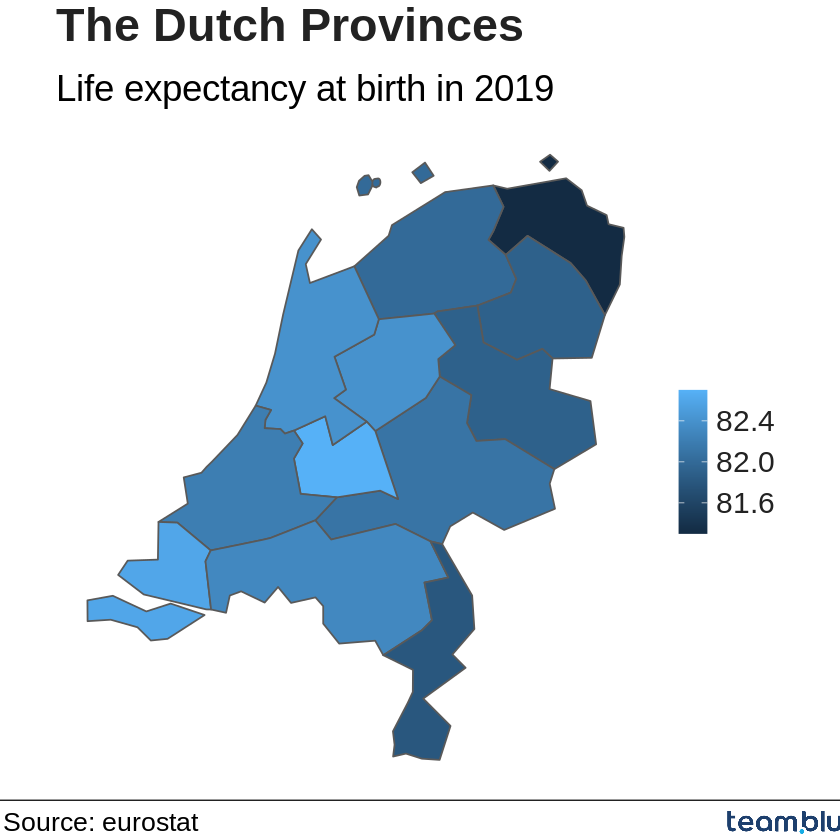

In [11]:
# map by provincie
library(sf)
system('wget --continue https://github.com/JacekPardyak/tb-data-science-talks/raw/master/2022-06-09/NUTS_RG_20M_2021_3035.shp.zip -O NUTS_RG_20M_2021_3035.shp.zip')
system('unzip NUTS_RG_20M_2021_3035.shp.zip')
map <- read_sf('NUTS_RG_20M_2021_3035.shp') %>% 
  filter(str_detect(NUTS_ID, "^NL")) %>% 
  filter(nchar(NUTS_ID) == 4)

map_df <- data  %>% 
  filter(sex == "T") %>% 
  filter(age == "Y_LT1") %>%
  filter(TIME_PERIOD == 2019) %>% 
  rename(NUTS_ID = geo) %>% 
  filter(str_detect(NUTS_ID, "^NL")) %>% 
  filter(nchar(NUTS_ID) == 4) %>%
  select(NUTS_ID,	OBS_VALUE) 

my_map_plot <- map  %>%
  left_join(map_df) %>%
  ggplot() + 
  geom_sf() + 
  aes(fill = OBS_VALUE) +
  bbc_style() +
  theme(axis.text.x = element_blank(),
        axis.text.y = element_blank(),
        legend.position = "right") +
  labs(title="The Dutch Provinces",
       subtitle = "Life expectancy at birth in 2019")

finalise_plot(plot_name = my_map_plot,
              source = "Source: eurostat",
              save_filepath = "my_map_plot.png",
              width_pixels = 640,
              height_pixels = 450,
              logo_image_path = "team.blue.png")    

# Animated map with audio

In [12]:
# animated map by provincie and year
library(gganimate)
# make some noise
library(av)
url = "https://github.com/JacekPardyak/tb-data-science-talks/raw/master/2022-06-09/Shouse-Love-Tonight.mp3"
audio = tempfile(tmpdir = tempdir(), fileext = ".mp3")
download.file(url, audio)
audio_short <- gsub('.mp3', '_short.mp3', audio)
av_audio_convert(audio, audio_short, start_time = 154, total_time = 20)

map_df <- data  %>% 
  filter(sex == "T") %>% 
  filter(age == "Y_LT1") %>%
  rename(NUTS_ID = geo) %>% 
  filter(str_detect(NUTS_ID, "^NL")) %>% 
  filter(nchar(NUTS_ID) == 4) %>%
  select(NUTS_ID,	OBS_VALUE, TIME_PERIOD) 

my_map_anim <- map  %>%
  right_join(map_df) %>%
  ggplot() + 
  geom_sf() + 
  aes(fill = OBS_VALUE)   +
  bbc_style()  +
  theme(axis.text.x = element_blank(),
        axis.text.y = element_blank(),
        legend.position = "right") +
  labs(title="The Dutch Provinces",
       subtitle = "Life expectancy at birth in {closest_state}") +
  transition_states(TIME_PERIOD)

my_map_anim  %>%
  animate(renderer = av_renderer(audio = audio_short), duration = 20)
anim_save('my_map_anim.mp4')

[1] "/tmp/RtmpBeCSwM/file3b3c820213_short.mp3"

Joining, by = "NUTS_ID"


# Interactive plots

In [16]:
library(plotly)
library(htmlwidgets)

map_df <- data  %>% 
  filter(sex == "T") %>% 
  filter(age == "Y_LT1") %>%
  filter(TIME_PERIOD == 2019) %>%
  rename(NUTS_ID = geo) %>% 
  filter(nchar(NUTS_ID) == 2) %>% 
  select(NUTS_ID,	OBS_VALUE) 

map <- read_sf('NUTS_RG_20M_2021_3035.shp') %>% 
  filter(nchar(NUTS_ID) == 2) %>% 
  select(NUTS_ID,	NUTS_NAME, geometry) %>% 
  rowwise() %>%
  mutate(centroid = st_centroid(geometry)) %>%
  mutate(Longitude = st_coordinates(centroid)[[1]]) %>%
  mutate(Latitude = st_coordinates(centroid)[[2]])

my_map_interactive <- map  %>%
  left_join(map_df) %>% 
  rename(Life_expectancy = OBS_VALUE) %>% 
  ggplot() + 
  geom_sf() + 
  aes(fill = Life_expectancy) +
  geom_text(aes(label = NUTS_NAME, x = Longitude, y = Latitude)) +
  bbc_style() +
  theme(axis.text.x = element_blank(),
        axis.text.y = element_blank(),
        legend.position = "right") +
  labs(title="Life expectancy in Europe in 2019",
       subtitle = "Life expectancy at birth in 2019") 
       
my_map_interactive %>%
       ggplotly() %>% 
       saveWidget("my_map_interactive.html")


Joining, by = "NUTS_ID"


# Extra


In [13]:
# make spectogram video
#av_audio_convert(audio, audio_short, start_time = 154, total_time = 5)
#av_spectrogram_video(audio_short, output = 'spectrogram.mp4', width = 1280, height = 720, res = 144)

[1] "/tmp/RtmpBeCSwM/file3b3c820213_short.mp3"

In [15]:
?geom_text

# References:

Plot as the BBC News 

ggplot2 charts in the style used by 

https://www.bbc.com/news/business-43668187

https://ec.europa.eu/eurostat/databrowser/view/demo_r_mlifexp/default/table?lang=en

https://bbc.github.io/rcookbook/#make_a_dumbbell_chart

https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units/nuts

Interactive data visualizations that bring our findings to life in a way that offers new insights.